In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

# Conceptual exercises

## Simulate your own clusters

In [3]:
np.random.seed(30100)

x = np.random.normal(0, 1, (60,50))
x[:20, 0] -= 7
x[-20:, 0] += 7

In [4]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

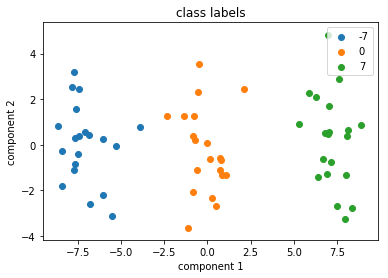

In [5]:
score_vec = pca.fit_transform(x)

plt.scatter(score_vec[:20, 0], score_vec[:20, 1], label = '-7')
plt.scatter(score_vec[20:40, 0], score_vec[20:40, 1], label = '0')
plt.scatter(score_vec[-20:, 0], score_vec[-20:, 1], label = '7')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('class labels')
plt.legend()
plt.show()

In [6]:
import pylab

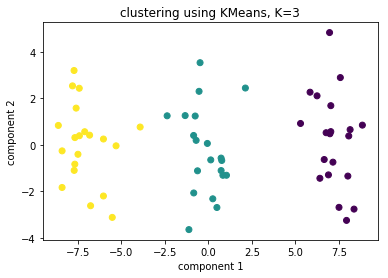

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(x))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using KMeans, K=3')
plt.show()

My 3-centroid KMeans algorithm wroks pretty well, and exactly separates all the data points into their correct classes.

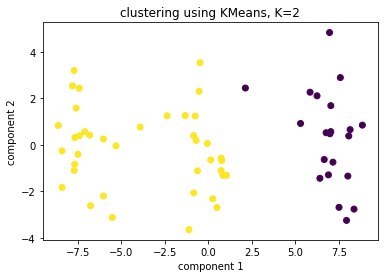

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(x))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using KMeans, K=2')
plt.show()

The 2-centroid KMeans algorithm, as expected, split the data into two sets, where most of the data fell into the left half.

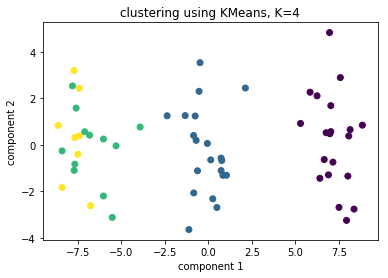

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(x))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using KMeans, K=4')
plt.show()

The 4-centroid KMeans algorithm, as expected, split the data into four sets. The class on the left seems to have been split into two clusters.

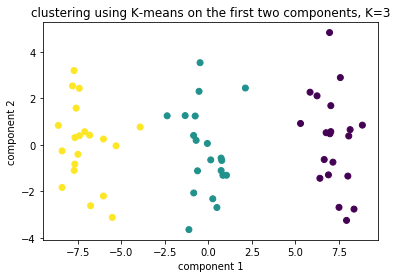

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(score_vec[:,:2])
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(score_vec[:,:2]))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using K-means on the first two components, K=3')
plt.show()

This still works pretty compared to using the raw data.

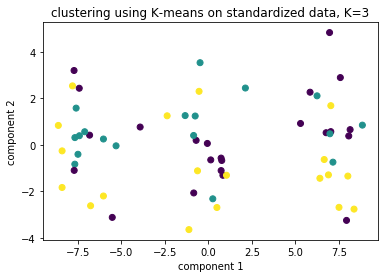

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_std = scaler.transform(x)
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_std)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(x_std))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using K-means on standardized data, K=3')
plt.show()

This looks worse, which is probably due to that rescaling has damaged the distance between the data points.

## Dissimilarity measures

In [12]:
arrest_data = pd.read_csv('./data/USArrests.csv')

In [13]:
arrest = arrest_data.values
scaler = StandardScaler().fit(arrest.T)
arrest_std = scaler.transform(arrest.T).T

In [14]:
corr = np.corrcoef(arrest_std)
eucd = euclidean_distances(arrest_std, arrest_std)

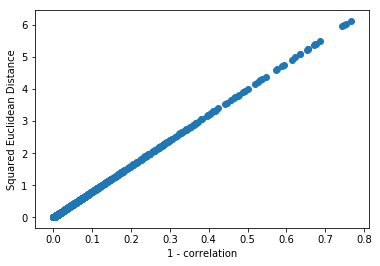

In [15]:
corrs = []
eucds = []
for i in range(corr.shape[0]):
    for j in range(i, corr.shape[0]):
        corrs.append(1-corr[i,j])
        eucds.append(eucd[i,j]**2)
plt.scatter(corrs, eucds)
plt.xlabel('1 - correlation')
plt.ylabel('Squared Euclidean Distance')
plt.show()

As we can see, their relationship is characterized by a linear function.

# Application exercises

## Dimension Reduction

In [16]:
wiki_data = pd.read_csv('./data/wiki.csv')

In [17]:
wiki = wiki_data.values
scaler = StandardScaler().fit(wiki)
wiki_std = scaler.transform(wiki)

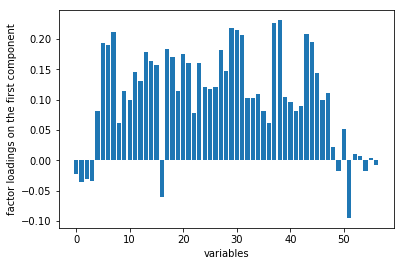

In [18]:
pca = PCA().fit(wiki_std)
plt.bar(range(len(pca.components_[0])), pca.components_[0], align='center')
plt.xlabel('variables')
plt.ylabel('factor loadings on the first component')
plt.show()

In [19]:
print("The ten most correlated variables on the first component are: {}"
      .format(list(wiki_data.columns[np.argsort(np.abs(pca.components_[0]))[-10:]])))

The ten most correlated variables on the first component are: ['pu2', 'pu1', 'exp2', 'use5', 'exp1', 'pu3', 'use4', 'use3', 'bi1', 'bi2']


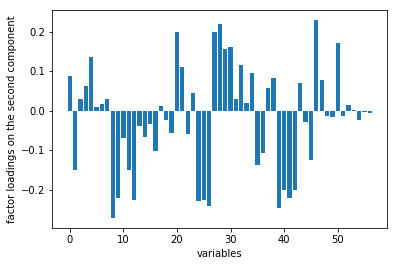

In [20]:
plt.bar(range(len(pca.components_[1])), pca.components_[1], align='center')
plt.xlabel('variables')
plt.ylabel('factor loadings on the second component')
plt.show()

In [21]:
print("The ten most correlated variables on the second component are: {}"
      .format(list(wiki_data.columns[np.argsort(np.abs(pca.components_[1]))[-10:]])))

The ten most correlated variables on the second component are: ['use2', 'inc3', 'peu2', 'sa2', 'enj2', 'exp4', 'sa1', 'sa3', 'inc1', 'peu1']


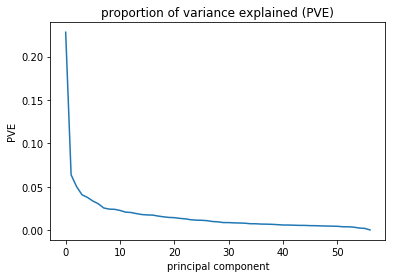

In [22]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title('proportion of variance explained (PVE)')
plt.xlabel('principal component')
plt.ylabel('PVE')
plt.show()

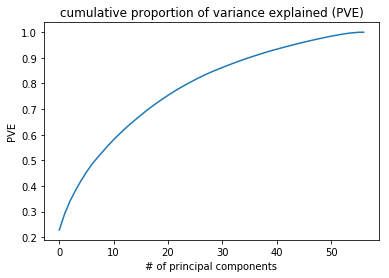

In [23]:
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.title('cumulative proportion of variance explained (PVE)')
plt.xlabel('# of principal components')
plt.ylabel('PVE')
plt.show()

In [24]:
print("The cimulative proportion of variance explained by the first two components is: {:.2%}"
      .format(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))

The cimulative proportion of variance explained by the first two components is: 29.18%


In [25]:
from sklearn.manifold import TSNE

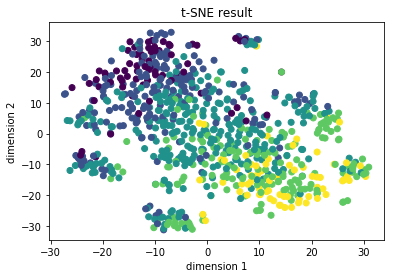

In [26]:
wiki_embedded = TSNE(n_components=2).fit_transform(wiki_std)

pylab.scatter(wiki_embedded[:,0], wiki_embedded[:,1], c=wiki_data['bi2'])
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('t-SNE result')
plt.show()

The plot is scattered based on the first two principle components, where the data are colored by whether an UOC faculty will use wikipedis in his teaching. This plot indicates a strata on these two dimensions.

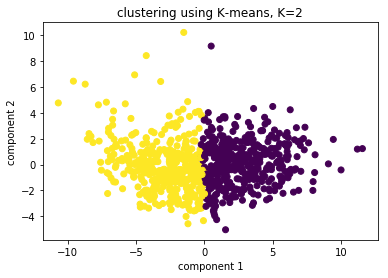

In [27]:
score_vec = pca.fit_transform(wiki_std)
kmeans = KMeans(n_clusters=2, random_state=0).fit(wiki_std)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(wiki_std))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using K-means, K=2')
plt.show()

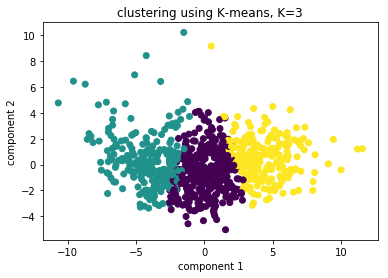

In [28]:
score_vec = pca.fit_transform(wiki_std)
kmeans = KMeans(n_clusters=3, random_state=0).fit(wiki_std)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(wiki_std))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using K-means, K=3')
plt.show()

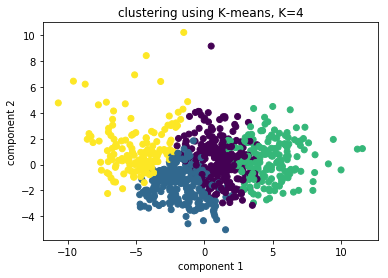

In [29]:
score_vec = pca.fit_transform(wiki_std)
kmeans = KMeans(n_clusters=4, random_state=0).fit(wiki_std)
pylab.scatter(score_vec[:,0], score_vec[:,1], c=kmeans.predict(wiki_std))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using K-means, K=4')
plt.show()

The clusters seem not so separable, which indicates that our KMeans algorithm might not be working well.

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
k_lst = np.arange(2, 11, 1)
k_means = []
wss_lst = []
silhouette_lst = []
for k in k_lst:
    km_tmp = KMeans(n_clusters=k, random_state=0).fit(wiki_std)
    k_means.append(km_tmp)
    wss_lst.append(-km_tmp.score(wiki_std))
    silhouette_lst.append(silhouette_score(wiki_std, km_tmp.labels_, metric='euclidean'))

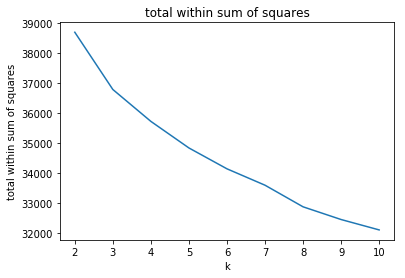

In [32]:
plt.plot(k_lst, wss_lst)
plt.title('total within sum of squares')
plt.xlabel('k')
plt.ylabel('total within sum of squares')
plt.show()

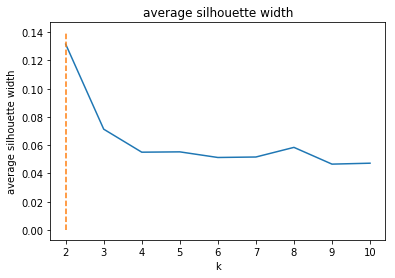

In [33]:
plt.plot(k_lst, silhouette_lst)
plt.plot([k_lst[np.argmax(silhouette_lst)]]*2, [0, 0.14], linestyle = 'dashed')
plt.title('average silhouette width')
plt.xlabel('k')
plt.ylabel('average silhouette width')
plt.show()

The Within Sum of Squares plot did not imply a clear bend, but the silhouette showed that K=2 is the optimal number of clusters.

In [34]:
from gap_statistic import OptimalK

Optimal number of clusters: 10


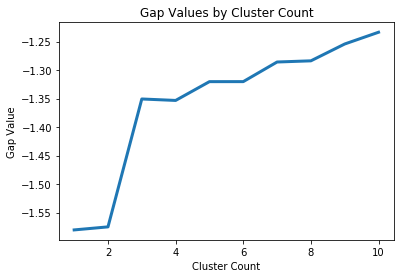

In [35]:
opt_K = OptimalK(parallel_backend='rust')
n_clusters = opt_K(wiki_std, cluster_array=np.arange(1, 11))
print('Optimal number of clusters: '+ str(n_clusters))
plt.plot(opt_K.gap_df.n_clusters, opt_K.gap_df.gap_value, linewidth=3)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

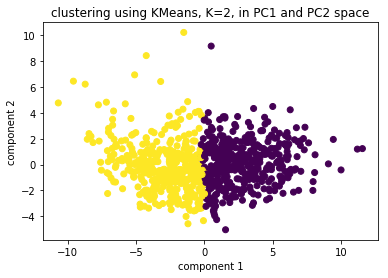

In [36]:
pylab.scatter(score_vec[:,0], score_vec[:,1], c=k_means[0].predict(wiki_std))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('clustering using KMeans, K=2, in PC1 and PC2 space')
plt.show()

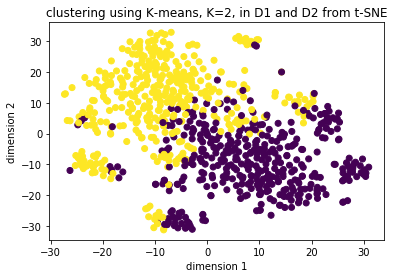

In [37]:
pylab.scatter(wiki_embedded[:,0], wiki_embedded[:,1], c=k_means[0].predict(wiki_std))
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('clustering using K-means, K=2, in D1 and D2 from t-SNE')
plt.show()

The PCA tends to cluster the data separated by a linear boundary, whereas the t-SNE can shape more complex structures.

# Exploring the clusters

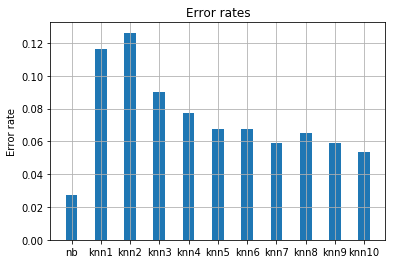

In [38]:
x = wiki_std
y = k_means[0].predict(wiki_std)

model_lst = []
nb = GaussianNB().fit(x, y)
model_lst.append(nb)

for k in range(1,11):
    model_lst.append(KNeighborsClassifier(n_neighbors=k).fit(x, y))
    
error_lst = [1-np.mean(cross_val_score(model, x, y, cv=KFold(10), scoring='accuracy')) for model in model_lst]

xrange = np.arange(0, 2*len(model_lst),2)
plt.bar(xrange, error_lst)
plt.ylabel('Error rate')
plt.title('Error rates')
plt.xticks(xrange, ('nb', 'knn1', 'knn2', 'knn3', 'knn4', 'knn5', 'knn6', 'knn7', 'knn8', 'knn9', 'knn10'))
plt.grid()
plt.show()

Among these models, the naive bayes has the lowest error rate. And I will go on with it.

In [39]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

model = InMemoryModel(nb.predict_proba, examples = x)
interpreter = Interpretation(x)
importance = interpreter.feature_importance.feature_importance(model)

2019-03-20 23:33:31,320 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[57/57] features ████████████████████ Time elapsed: 3 seconds

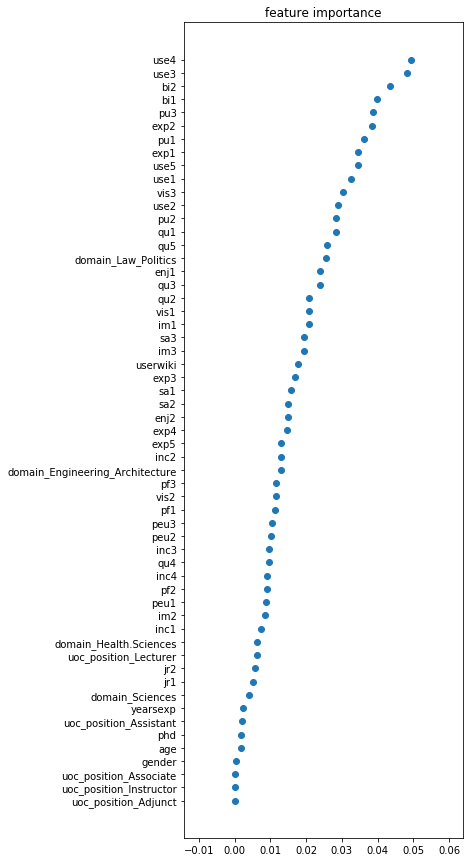

In [40]:
features = np.array(wiki_data.columns)
plt.figure(figsize=(5,15))
plt.scatter(importance, np.arange(0,len(features)))
_ = plt.yticks(np.arange(0,len(features)), features[list(importance.index)])
_ = plt.title('feature importance')

Of all the features, 'use4', 'use3', 'pu3', 'bi2', 'exp1' turned put to be the most important ones.

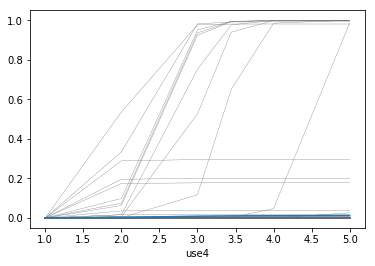

In [41]:
from pycebox.ice import ice, ice_plot

ice_df = ice(wiki_data, 'use4', lambda x:nb.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, centered=True)
_ = plt.xlabel('use4')

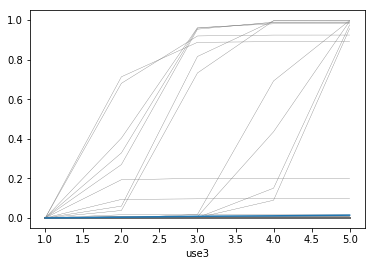

In [42]:
from pycebox.ice import ice, ice_plot

ice_df = ice(wiki_data, 'use3', lambda x:nb.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, centered=True)
_ = plt.xlabel('use3')

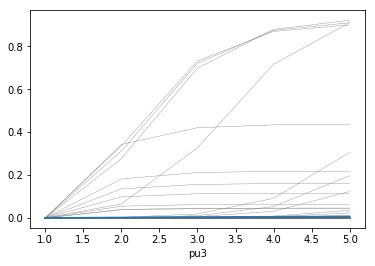

In [43]:
from pycebox.ice import ice, ice_plot

ice_df = ice(wiki_data, 'pu3', lambda x:nb.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, centered=True)
_ = plt.xlabel('pu3')

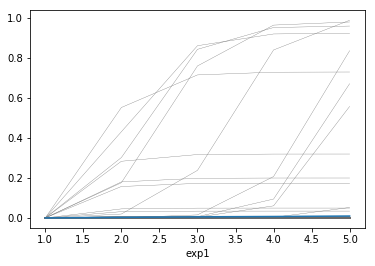

In [44]:
from pycebox.ice import ice, ice_plot

ice_df = ice(wiki_data, 'exp1', lambda x:nb.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, centered=True)
_ = plt.xlabel('exp1')

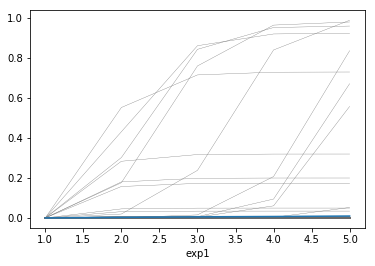

In [45]:
from pycebox.ice import ice, ice_plot

ice_df = ice(wiki_data, 'exp1', lambda x:nb.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, centered=True)
_ = plt.xlabel('exp1')

It seems the KMeans alogrithm has clustered the faculties based on whether they support or oppose the use of wikipedia.